In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('diamonds.csv')
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


The Unnamed: 0 column, which is meant to be the 'Id' can be dropped bcz we already have indices.

In [3]:
df.drop(columns = ['Unnamed: 0'] , inplace=True)
df.head(2)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [5]:
df.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

So there is no null values in any column.

In [6]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000



Here, the min values of x,y and z are 0. It doesnt make any sense to have the diamond dimension to be zero. May be this data is there by mistake. Lets have a look at those logic less rows.

In [7]:
df.loc[(df['x']==0) | (df['y']==0) | (df['z']==0)]

,carat,cut,color,clarity,depth,table,price,x,y,z
2207,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2314,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4791,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5471,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10167,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0
13601,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
24394,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0


Such cases are dealt by repalcing those partiular cells by mean,median or mode Or they can be dropped also, depending on the data. Here dropping them seems a better option. 

In [8]:
df = df[(df[['x','y','z']] != 0).all(axis=1)]

In [9]:
df.shape

(53920, 10)

**Dealing with Categorical columns**

Cut, Color and clarity are three categorical features. Lets see the unique values in them.

In [10]:
for col in ['cut','color','clarity']:
    print('{} : {}'.format(col,df[col].unique()))
df.nunique()  #To check number of unique values in each feature

cut : ['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
color : ['E' 'I' 'J' 'H' 'F' 'G' 'D']
clarity : ['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


carat        273
cut            5
color          7
clarity        8
depth        184
table        127
price      11597
x            553
y            550
z            374
dtype: int64

**Correlation between features**

<AxesSubplot:>

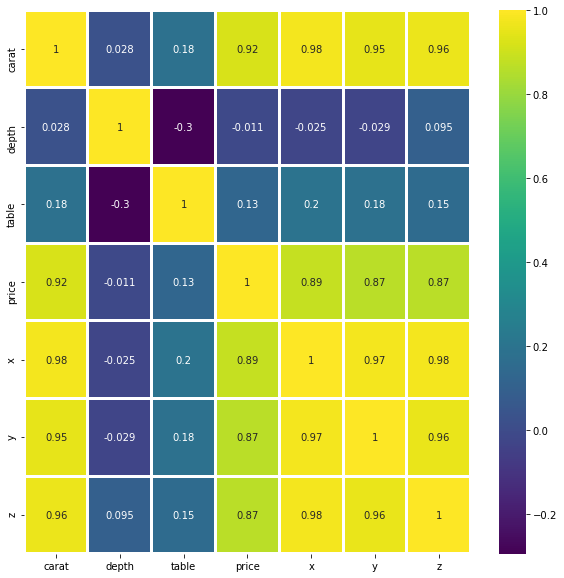

In [11]:
plt.figure(figsize=(10,10))
corr = df.corr()
sns.heatmap(data=corr , cmap = 'viridis', annot = True, linewidth=2)

Correlation coefficient between price ~ carat, price ~ dimensions are high (0.9 above). That means features carat and dimensions of the diamond highly affect the target, i.e. diamond price. Also the features x,y,z also show high coorelation coefficient among each other.So they can be combined into one feature.

**Visualisation of all Features**

PRICE ~ CARAT

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='carat', ylabel='price'>

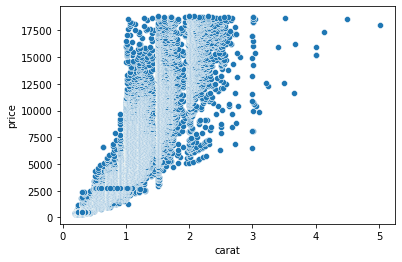

In [12]:
sns.scatterplot(df.carat,df.price)

PRICE ~ CUT

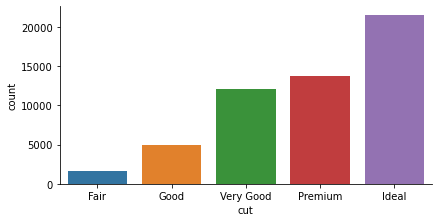

In [13]:
sns.catplot(x='cut', data=df , kind='count',aspect=2,order=['Fair','Good','Very Good','Premium','Ideal'], height =3 )

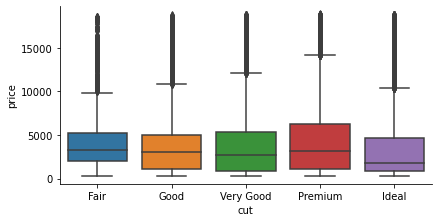

In [14]:
sns.catplot(x='cut', y = 'price',data=df ,aspect=2,kind='box' ,order=['Fair','Good','Very Good','Premium','Ideal'], height = 3)

PRICE ~ COLOR

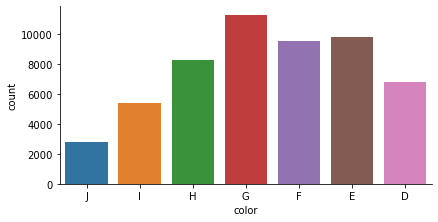

In [15]:
sns.catplot(x='color', data=df , kind='count',aspect=2 ,order=['J','I','H','G','F','E','D'], height = 3)

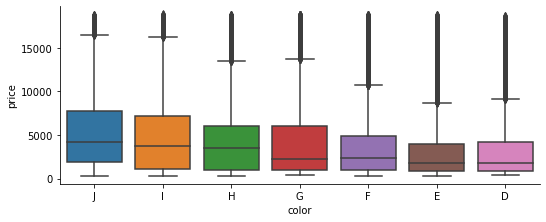

In [16]:
sns.catplot(x='color', y='price', data=df ,aspect=2.5,kind='box',order=['J','I','H','G','F','E','D'], height = 3 )

CLARITY ~ PRICE

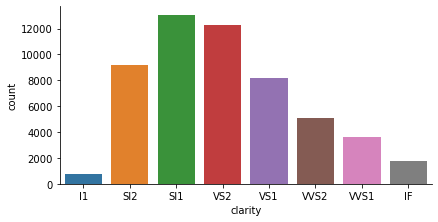

In [17]:
sns.catplot(x='clarity', data=df , kind='count',aspect=2 ,order=['I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF'], height = 3 )

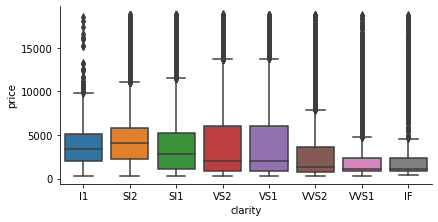

In [18]:
sns.catplot(x='clarity',y='price',data=df, kind='box',aspect=2,order=['I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF'], height = 3)

PRICE ~ DEPTH


<function matplotlib.pyplot.show(close=None, block=None)>

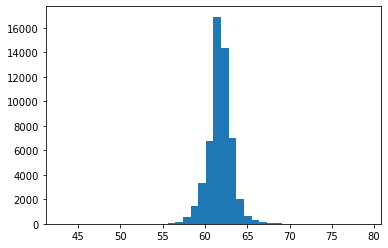

In [19]:
plt.hist(x='depth',data=df,bins=40)
plt.show

<AxesSubplot:xlabel='depth', ylabel='price'>

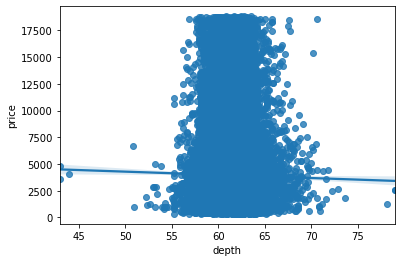

In [20]:
sns.regplot(x='depth',y='price',data=df)

x, y and z dimensions

(2.0, 10.0)

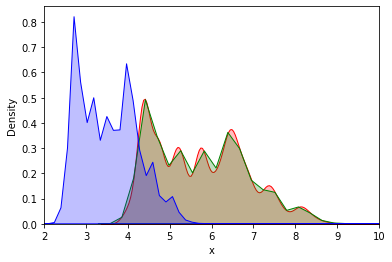

In [21]:
sns.kdeplot(df['x'] ,shade=True , color='r' )
sns.kdeplot(df['y'] , shade=True , color='g' )
sns.kdeplot(df['z'] , shade= True , color='b')
plt.xlim(2,10)    #Get or set the x limits of the current axes.

**FEATURE ENGINEERING**

Because the diamond dimensions - x,y and z are correlated to each other (We have also seen it in the correlation matrix) , so we can replace these 3 features with one single feature -VOLUME. So lets add volume feature and drop the x,y and z features.

In [22]:
df['volume'] = df['x']*df['y']*df['z']
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,volume
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,34.505856
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,51.917250


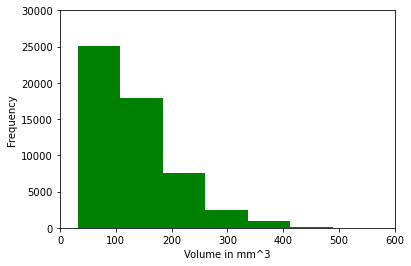

In [23]:
plt.hist( x=df['volume'] , bins=50 ,color='g')
plt.xlabel('Volume in mm^3')
plt.ylabel('Frequency')
plt.xlim(0,600)
plt.ylim(0,30000)
plt.show()

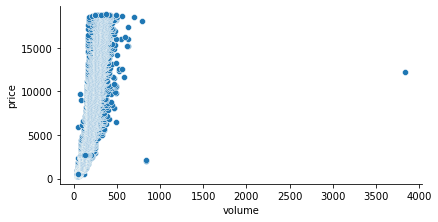

In [24]:
sns.relplot(x='volume',y='price',data=df, height = 3,  aspect = 2)

In [25]:
df.drop(['x','y','z'], axis=1, inplace= True)

**FEATURE ENCODING**

Now we convert categorial columns to numerical values. This step can be done manually for small datasets,or by using scikit learn's LabelEncoder or OneHotEncoder, depending on values in that column.

In [26]:
df.head()

,carat,cut,color,clarity,depth,table,price,volume
0,0.23,Ideal,E,SI2,61.5,55.0,326,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,34.505856
2,0.23,Good,E,VS1,56.9,65.0,327,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,334,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335,51.917250


Using LabelEncoder of scikit learn

In [28]:
from sklearn.preprocessing import LabelEncoder
label_cut = LabelEncoder()
label_color = LabelEncoder()
label_clarity = LabelEncoder()


df['cut'] = label_cut.fit_transform(df['cut'])
df['color'] = label_color.fit_transform(df['color'])
df['clarity'] = label_clarity.fit_transform(df['clarity'])

In [ ]:
# ##Using map funciton of python
# L_cut_map = {'Fair':0,'Good':1,'Very Good':2,'Premium':3,'Ideal':4}
# df['cut'] = [L_cut_map.get(item) for item in df['cut']]

# L_color_map = {'J':0,'I':1,'H':2,'G':3,'F':4,'E':5,'D':6}
# df['color'] = [L_color_map.get(item) for item in df['color']]

# L_clar_map = {'I1':0,'SI2':1,'SI1':2,'VS2':3,'VS1':4,'VVS2':5,'VVS1':6,'IF':7}
# df['clarity'] = [L_clar_map.get(item) for item in df['clarity']]

In [30]:
df.head()

,carat,cut,color,clarity,depth,table,price,volume
0,0.23,2,1,3,61.5,55.0,326,38.202030
1,0.21,3,1,2,59.8,61.0,326,34.505856
2,0.23,1,1,4,56.9,65.0,327,38.076885
3,0.29,3,5,5,62.4,58.0,334,46.724580
4,0.31,1,6,3,63.3,58.0,335,51.917250


In [31]:
df.shape

(53920, 8)

**TRAIN TEST SPLIT**

In [32]:
X = df.drop(['price'],axis=1)
Y = df['price']

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.1, random_state=40)

-Then train the X_train and Y_train dataframes by LinearRegression model.

-Predicting the values for X_test and finding the rmse

In [35]:
X_test.head()

,carat,cut,color,clarity,depth,table,volume
8917,0.80,4,1,4,62.4,54.0,132.138864
20172,1.06,2,3,7,60.1,57.0,175.650174
2562,0.79,2,2,2,60.8,55.0,132.415140
28447,0.31,2,4,6,60.9,56.0,52.315120
1661,0.90,4,6,5,63.1,59.0,141.114435


**MODELLING**

**By Linear Regression :**

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

Lreg = LinearRegression()
Lreg.fit(X_train,y_train)
prediction = Lreg.predict(X_test)
rmse_Lreg = np.sqrt(mean_squared_error(y_test, prediction))
print('RMSE value is = {}'.format(rmse_Lreg))
r2_Lreg = r2_score(y_test, prediction)
print('R-squared value is {}'.format(r2_Lreg))

RMSE value is = 1407.0759041238468
R-squared value is 0.878703573793618


**By Random Forest Regression :**

In [40]:
from sklearn.ensemble import RandomForestRegressor

RFreg_model = RandomForestRegressor()
RFreg_model.fit(X_train,y_train)
prediction2 = RFreg_model.predict(X_test)
rmse_RFreg = np.sqrt(mean_squared_error(y_test, prediction2))
print('RMSE value is = {}'.format(rmse_RFreg))
r2_RFreg = r2_score(y_test, prediction2)
print('R-squared value is {}'.format(r2_RFreg))

RMSE value is = 569.0784223923556
R-squared value is 0.9801592908251778


In [41]:
Result= pd.DataFrame({'Actual Price':y_test,'Predicted Price By LinReg':prediction,'Predicted Price By RandForest':prediction2})
Result

,Actual Price,Predicted Price By LinReg,Predicted Price By RandForest
8917,4495,4777.938876,3924.265000
20172,8626,7140.637116,8628.740000
2562,3210,3754.460665,3127.565000
28447,671,336.541991,831.958167
1661,3024,4085.676634,2972.270000
...,...,...,...
16013,6406,7817.097389,7327.850000
18771,7677,6560.853560,7982.570000
667,2846,3436.999634,2735.640000
25079,13599,13823.476115,15053.730000


**Thus, it can be concluded that RANDOM FOREST REGRESSION provides better results than Linear Regression.**